# Acid-base equilibria

In [1]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import utils
import numpy as np
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Henderson-Hasselbalch equation

For a monoprotic acid,
$$ \mathrm{pH} = \mathrm{p}K_\mathrm{a} + \log_{10} \left( \frac{[\mathrm{A}^{-}]}{[\mathrm{HA}]} \right) $$
and in general
$$ k \cdot \mathrm{pH} = \mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k} + \log_{10} \left( \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]} \right) $$

Can rearrange this to express the ratio of a particular acid species relative to their total concentration as a function of pH,
$$ \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{c_a} = \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{\sum_{j=0}^{n}
[\mathrm{H}_{n-j}\mathrm{A}^{j-}]} = \frac{\frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]}}{1 +\sum_{j=1}^{n}
\frac{[\mathrm{H}_{n-j}\mathrm{A}^{j-}]}{[\mathrm{H}_n\mathrm{A}]}} = \frac{
 10^{k\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k})}
}{
1 + \sum_{j=1}^{n} 10^{j\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},j})}
}$$
which can be visualised on a speciation diagram.

In [2]:
pKa1 = widgets.FloatSlider(
    min=-4, max=18, step=0.01, value=0.0, continuous_update=False,
    description=r'\(\mathrm{p}K_{\mathrm{a},1}\)',
    layout=widgets.Layout(width='auto', grid_area='pKa1')) # read in pKa1
#
i2 = widgets.Checkbox(
    value=False, description=' ', 
    disabled=False, indent=False,
    layout=widgets.Layout(width='auto', grid_area='i2')) # turn diprotic on/off
pKa2 = widgets.FloatSlider(
    min=-4, max=18, step=0.01, value=14.0, continuous_update=False,
    description=r'\(\mathrm{p}K_{\mathrm{a},2}\)',
    layout=widgets.Layout(width='auto', grid_area='pKa2')) # read in pKa2
def update_k2_range(*args):
    # bound pKa2 from below
    pKa2.min = pKa1.value
pKa1.observe(update_k2_range, 'value')
#
i3 = widgets.Checkbox(
    value=False, description=' ', 
    disabled=False, indent=False,
    layout=widgets.Layout(width='auto', grid_area='i3')) # turn triprotic on/off
pKa3 = widgets.FloatSlider(
    min=-4, max=18, step=0.01, value=14.0, continuous_update=False,
    description=r'\(\mathrm{p}K_{\mathrm{a},3}\)',
    layout=widgets.Layout(width='auto', grid_area='pKa3')) # read in pKa3
def update_k3_range(*args):
    # bound pKa3 from below
    pKa3.min = pKa2.value
pKa2.observe(update_k3_range, 'value')

gs = widgets.GridBox(
    children=[pKa1, pKa2, pKa3, i2, i3],
        layout=widgets.Layout(
            width='65%',
            grid_template_rows='auto',
            grid_template_columns='90% 10%',
            grid_template_areas='''
            "  pKa1 . "
            "  pKa2 i2 "
            "  pKa3 i3 "
            ''')
       )
display(gs)

GridBox(children=(FloatSlider(value=0.0, continuous_update=False, description='\\(\\mathrm{p}K_{\\mathrm{a},1}…

<IPython.core.display.Javascript object>


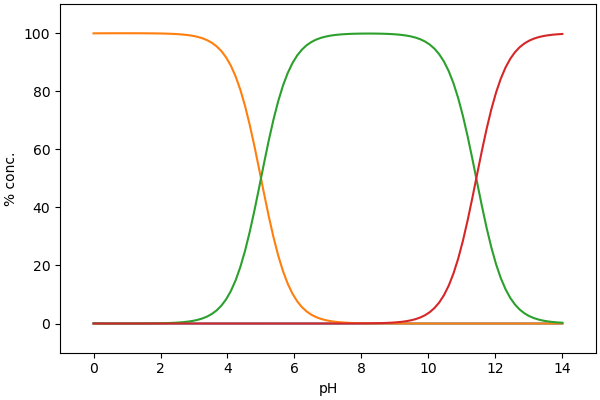

Output()

In [3]:
fig = plt.figure(constrained_layout=True, figsize=(6, 4))
ax = fig.add_subplot(111)
pH = np.linspace(0, 14, 100)
ax.set_xlim([-1,15])
ax.set_xlabel('pH')
ax.set_ylim([-10,110])
ax.set_ylabel(r'% conc.')
lines = []
nans = np.nan*np.ones_like(pH)
for i in range(4):
    lines.append(ax.plot(pH, nans)[0])

def update(pKa1, pKa2, pKa3, i2, i3):
    args = [pKa1,]
    args.append(pKa2) if i2 else lines[-2].set_ydata(nans)
    args.append(pKa3) if i2 and i3 else lines[-1].set_ydata(nans)
    utils.plot_speciation(lines, pH, *args)
    fig.canvas.draw()

wplot = widgets.interactive_output(update, dict(pKa1=pKa1, pKa2=pKa2, pKa3=pKa3, i2=i2, i3=i3))
display(wplot)
    